In [1]:
import networkx as nx
import math
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import det
from numpy import cov

In [11]:
data = sio.loadmat('Market.mat')['DI']
data.shape

(7, 190, 12)

In [3]:
#the nodes are the companies:
vertex_set = [i for i in range(12)]
G = nx.DiGraph()
for v in vertex_set:
    G.add_node(v)

In [4]:
all_nodes = set(vertex_set)

In [5]:
I = np.zeros((12,12))

In [7]:
T = 7
for i in vertex_set:
    for j in vertex_set:
        if i == j:
            continue
        else:
            s_x = {i}
            s_y = {j}
            s_z = all_nodes - s_x - s_y
            x_t = data[:,:,i]  #company i
            y_t = data[:,:,j]  #company j

            z_t = [] #remaining companies
            for k in s_z:
                z_t.append(data[:,:,k])
                
            z_t = np.asarray(z_t)
            
            k = 0
            for t in np.arange(2,T): #t=1 log 1 = 0
                
                m1 = np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,190)))
                m2 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,190)))) )
                m3 = np.concatenate((y_t[:t-1,:],z_t[:,:t-1,:].reshape(-1,190)))
                m4 = np.concatenate( (x_t[:t-1,:] , np.concatenate((y_t[:t,:],z_t[:,:t-1,:].reshape(-1,190)))) )
                
                c1 = cov(m1)
                d1 = det(c1)
                
                c2 = cov(m2)
                d2 = det(c2)
               
                c3 = cov(m3)
                d3 = det(c3)
                
                c4 = cov(m4)                
                d4 = det(c4)
                
                k += np.log( (d1 * d2) / (d3 * d4) )
                print("DI of {} to {}".format(i,j),"t=",t,"k=",k)
                print("d3=",d3,"d4=",d4,"d3 * d4=",d3*d4 )
            
            DI = 0.5 * k
            I[i,j] = DI
        

DI of 0 to 1 t= 2 k= 0.04855154249509882
d3= 1.2118649750474422e-25 d4= 2.501901221207995e-29 d3 * d4= 3.031966461010392e-54
DI of 0 to 1 t= 3 k= 0.08316459867707848
d3= 9.10304977845736e-54 d4= 3.116635484700175e-59 d3 * d4= 2.837088795853228e-112
DI of 0 to 1 t= 4 k= 0.119690403232887
d3= 1.3407532131160783e-83 d4= 3.305829354583384e-91 d3 * d4= 4.432301329171123e-174
DI of 0 to 1 t= 5 k= 0.2141472209112525
d3= 6.613403802674579e-115 d4= 8.184214479635418e-125 d3 * d4= 5.412551516152523e-239
DI of 0 to 1 t= 6 k= 0.42892258102626346
d3= 4.8743633192664005e-148 d4= 3.2216811985208347e-160 d3 * d4= 1.570364466044017e-307
DI of 0 to 2 t= 2 k= 0.0013417225698349555
d3= 1.2118649750474394e-25 d4= 1.8986389542665276e-29 d3 * d4= 2.3008940489363019e-54
DI of 0 to 2 t= 3 k= 0.04535501761047316
d3= 9.103049778457539e-54 d4= 1.388693908684116e-59 d3 * d4= 1.2641349777792274e-112
DI of 0 to 2 t= 4 k= 0.1765281860019621
d3= 1.3407532131161058e-83 d4= 3.513691161029961e-91 d3 * d4= 4.7109927140485

DI of 1 to 8 t= 3 k= 0.03146673435279296
d3= 2.1558182483273274e-50 d4= 9.402914657499325e-60 d3 * d4= 2.0270975006101547e-109
DI of 1 to 8 t= 4 k= 0.2181338243344653
d3= 1.4342194721220416e-78 d4= 2.1055749035407278e-91 d3 * d4= 3.0198565266696013e-169
DI of 1 to 8 t= 5 k= 0.301281813728658
d3= 2.8739080912362585e-108 d4= 4.4989260847936534e-125 d3 * d4= 1.2929500076962342e-232
DI of 1 to 8 t= 6 k= 0.3531819305548478
d3= 1.3639199005473334e-139 d4= 1.9392750927416745e-160 d3 * d4= 2.6450158916261456e-299
DI of 1 to 9 t= 2 k= 0.007738014165132477
d3= 1.71523342282687e-23 d4= 6.08435905229597e-28 d3 * d4= 1.0436096002977268e-50
DI of 1 to 9 t= 3 k= 0.01314564740569035
d3= 2.155818248327294e-50 d4= 1.9711223840212914e-58 d3 * d4= 4.2493816051595e-108
DI of 1 to 9 t= 4 k= 0.08250541883942314
d3= 1.4342194721219804e-78 d4= 5.598666939183333e-90 d3 * d4= 8.029717142102304e-168
DI of 1 to 9 t= 5 k= 0.11259028252376986
d3= 2.8739080912361484e-108 d4= 1.6481370782178002e-123 d3 * d4= 4.7365944

DI of 3 to 6 t= 3 k= 0.12665338163165404
d3= 7.238503084424038e-50 d4= 1.1964973276294918e-59 d3 * d4= 8.660849596551195e-109
DI of 3 to 6 t= 4 k= 0.2211459195029823
d3= 1.626248694205692e-77 d4= 3.708788149395793e-91 d3 * d4= 6.031411885040453e-168
DI of 3 to 6 t= 5 k= 0.26967897973756233
d3= 1.1128901717678178e-106 d4= 8.153870794651893e-125 d3 * d4= 9.074362669232738e-231
DI of 3 to 6 t= 6 k= 0.46408852188136973
d3= 6.037740455037947e-138 d4= 3.2798217882261686e-160 d3 * d4= 1.9802712696088038e-297
DI of 3 to 7 t= 2 k= 7.1601320578368524e-06
d3= 2.7855596708054103e-23 d4= 3.402714485769221e-29 d3 * d4= 9.478464242824112e-52
DI of 3 to 7 t= 3 k= 0.3871930497780147
d3= 7.238503084424367e-50 d4= 1.3723177232184603e-59 d3 * d4= 9.93352607232705e-109
DI of 3 to 7 t= 4 k= 0.40624870940611
d3= 1.62624869420582e-77 d4= 4.516806144571558e-91 d3 * d4= 7.34545009459032e-168
DI of 3 to 7 t= 5 k= 0.41310911956521507
d3= 1.1128901717678367e-106 d4= 8.974969195270428e-125 d3 * d4= 9.98815500933555

DI of 5 to 6 t= 3 k= 0.17847584351576404
d3= 2.168770171545708e-51 d4= 1.1964973276294969e-59 d3 * d4= 2.5949277144970052e-110
DI of 5 to 6 t= 4 k= 0.19015449648289945
d3= 4.2663033690946124e-80 d4= 3.7087881493958e-91 d3 * d4= 1.5822815377025475e-170
DI of 5 to 6 t= 5 k= 0.2682603654776645
d3= 3.543047382588694e-110 d4= 8.153870794651374e-125 d3 * d4= 2.888955057695595e-234
DI of 5 to 6 t= 6 k= 0.36263214983456055
d3= 5.3107965873952996e-142 d4= 3.2798217882266525e-160 d3 * d4= 1.7418466360178855e-301
DI of 5 to 7 t= 2 k= 0.9150867032146838
d3= 3.1812204349876857e-24 d4= 3.4027144857692287e-29 d3 * d4= 1.0824784856557684e-52
DI of 5 to 7 t= 3 k= 0.936511015544857
d3= 2.168770171545728e-51 d4= 1.3723177232184238e-59 d3 * d4= 2.976241743999664e-110
DI of 5 to 7 t= 4 k= 0.9791135812131123
d3= 4.266303369094886e-80 d4= 4.516806144572012e-91 d3 * d4= 1.9270065272136056e-170
DI of 5 to 7 t= 5 k= 1.06122017327917
d3= 3.5430473825882865e-110 d4= 8.974969195270947e-125 d3 * d4= 3.1798741116115

DI of 7 to 6 t= 2 k= 0.0007026341225499394
d3= 2.3327859026027142e-23 d4= 3.2165614281075433e-29 d3 * d4= 7.50354915434493e-52
DI of 7 to 6 t= 3 k= 0.06036227546095603
d3= 2.584918037535073e-50 d4= 1.196497327629422e-59 d3 * d4= 3.0928475240518043e-109
DI of 7 to 6 t= 4 k= 0.37655270964764864
d3= 2.303580155321677e-78 d4= 3.7087881493958023e-91 d3 * d4= 8.543490781240377e-169
DI of 7 to 6 t= 5 k= 0.44998417549931313
d3= 4.172252988168633e-108 d4= 8.153870794650416e-125 d3 * d4= 3.4020011788121144e-232
DI of 7 to 6 t= 6 k= 0.6652073100266223
d3= 1.4906712820476249e-139 d4= 3.279821788226555e-160 d3 * d4= 4.889136149943413e-299
DI of 7 to 8 t= 2 k= 0.030246710395352906
d3= 2.3327859026027e-23 d4= 4.0673136709800326e-29 d3 * d4= 9.488171993125457e-52
DI of 7 to 8 t= 3 k= 0.0822095329199472
d3= 2.584918037535112e-50 d4= 9.402914657499205e-60 d3 * d4= 2.4305763703572984e-109
DI of 7 to 8 t= 4 k= 0.16385308766724477
d3= 2.3035801553217532e-78 d4= 2.1055749035408354e-91 d3 * d4= 4.85036056334

DI of 9 to 6 t= 3 k= 0.1589902539239688
d3= 6.460590638007683e-53 d4= 1.1964973276295303e-59 d3 * d4= 7.730079433284554e-112
DI of 9 to 6 t= 4 k= 0.1922576414209599
d3= 6.382053696775788e-82 d4= 3.708788149395805e-91 d3 * d4= 2.3669685119409733e-172
DI of 9 to 6 t= 5 k= 0.23067273877403902
d3= 1.1821156416807088e-112 d4= 8.153870794652512e-125 d3 * d4= 9.638818206602245e-237
DI of 9 to 6 t= 6 k= 0.33700237678084943
d3= 3.271928085438282e-145 d4= 3.279821788226935e-160 d3 * d4= 1.0731341024132118e-304
DI of 9 to 7 t= 2 k= 0.3552912676029602
d3= 8.937052486129882e-25 d4= 3.402714485769228e-29 d3 * d4= 3.0410237954634045e-53
DI of 9 to 7 t= 3 k= 0.43172364140502817
d3= 6.46059063800811e-53 d4= 1.3723177232186177e-59 d3 * d4= 8.865983034998806e-112
DI of 9 to 7 t= 4 k= 0.5172956914139948
d3= 6.38205369677626e-82 d4= 4.516806144571751e-91 d3 * d4= 2.8826499352585866e-172
DI of 9 to 7 t= 5 k= 0.6049396119060907
d3= 1.1821156416806905e-112 d4= 8.974969195271017e-125 d3 * d4= 1.060945146933223

DI of 11 to 6 t= 5 k= 0.18362615815651523
d3= 2.625111110419137e-106 d4= 8.153870794652226e-125 d3 * d4= 2.1404816815963677e-230
DI of 11 to 6 t= 6 k= 0.24514874853905444
d3= 1.8434668495498783e-137 d4= 3.2798217882268546e-160 d3 * d4= 6.046242739027608e-297
DI of 11 to 7 t= 2 k= 0.08666170942631347
d3= 3.601350909719569e-23 d4= 3.402714485769258e-29 d3 * d4= 1.2254368908841073e-51
DI of 11 to 7 t= 3 k= 0.10901960397309035
d3= 1.485098004363134e-49 d4= 1.3723177232185837e-59 d3 * d4= 2.0380263121040782e-108
DI of 11 to 7 t= 4 k= 0.13868011524633994
d3= 2.6294555575580444e-77 d4= 4.516806144571357e-91 d3 * d4= 1.187674101925548e-167
DI of 11 to 7 t= 5 k= 0.21032684946509736
d3= 2.625111110418911e-106 d4= 8.974969195272465e-125 d3 * d4= 2.356029135017722e-230
DI of 11 to 7 t= 6 k= 0.2699657834849528
d3= 1.8434668495503017e-137 d4= 4.6098084015501615e-160 d3 * d4= 8.498028971036189e-297
DI of 11 to 8 t= 2 k= 0.0739887146600214
d3= 3.601350909719575e-23 d4= 4.0673136709800735e-29 d3 * d4= 

In [8]:
I

array([[0.        , 0.21446129, 0.17486153, 0.23875263, 0.4417295 ,
        0.46648449, 0.5654242 , 0.65589036, 0.48979577, 0.30631093,
        0.36049843, 0.15087625],
       [0.21792722, 0.        , 0.166417  , 0.30984478, 0.14951375,
        0.22867397, 0.05770887, 0.19937058, 0.17659097, 0.15280796,
        0.12097778, 0.09010245],
       [0.16697793, 0.28812927, 0.        , 0.14229406, 0.52548644,
        0.09718658, 0.19454128, 0.33300798, 0.19370615, 0.41370819,
        0.29075603, 0.21314792],
       [0.18362704, 0.15889817, 0.24891324, 0.        , 0.23008356,
        0.13567689, 0.23204426, 0.26690026, 0.27556891, 0.2057861 ,
        0.18361858, 0.26487436],
       [0.29662227, 0.22888443, 0.22585786, 0.32253817, 0.        ,
        0.25023913, 0.25084481, 0.24000607, 0.27646143, 0.30368316,
        0.32306604, 0.2001254 ],
       [0.31288903, 0.31904612, 0.14395927, 0.3053622 , 0.25811677,
        0.        , 0.18131607, 0.60344334, 0.17518052, 0.30102205,
        0.22253352,

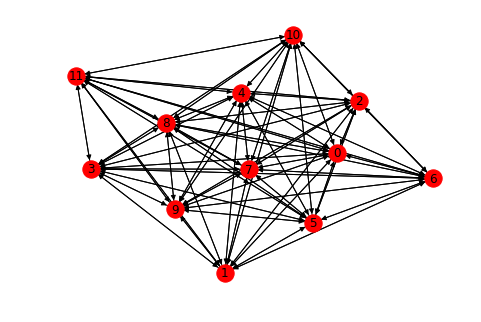

In [9]:
for i in vertex_set:
    for j in vertex_set:
        G.add_edge(i,j,weight = I[i,j])
nx.draw(G, with_labels = True)

In [10]:
#t=3
print(y_t[:3,:].shape,z_t[:,:2,:].reshape(-1,190).shape)
print(np.concatenate((y_t[:3,:],z_t[:,:2,:].reshape(-1,190))).shape)
m1 = np.concatenate((y_t[:3,:],z_t[:,:2,:].reshape(-1,190)))
c1 = cov(m1)
d1 = det(c1)
print(c1.shape)
print(d1)

(3, 190) (20, 190)
(23, 190)
(23, 23)
3.518462879577946e-52
